In [71]:
import platform
print(platform.python_version())



3.10.0


In [72]:
pip install tensorflow scikit-learn pandas numpy matplotlib



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
train_data=pd.read_csv("D:/Desktop_documents/7th_Semester/UNIVERSITY/G2-BIG_DATA\PROJECT/Train.csv")
test_data=pd.read_csv("D:/Desktop_documents/7th_Semester/UNIVERSITY/G2-BIG_DATA/PROJECT/Test.csv")

In [75]:
train_data.isnull().sum()

#check null values in dataset
#info : 1463 values are missing in column "Item_Weight"

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [76]:
#Handling The missing values
train_data['Item_Weight'] 

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [77]:
#Handling The missing values
train_data['Outlet_Size'] 

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [78]:
#univariate Imputation
#Filling Missing Values using information from the column that has missing data
mean_weight = train_data['Item_Weight'].mean()

In [79]:
median_weight = train_data['Item_Weight'].median()

In [80]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [81]:
train_data['Item_Weight_mean']=train_data['Item_Weight'].fillna(mean_weight)
train_data['Item_Weight_median']=train_data['Item_Weight'].fillna(median_weight)

In [82]:

print("Original Weight variable variance",train_data['Item_Weight'].var())
print("Item Weight variance after mean imputation",train_data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",train_data['Item_Weight_median'].var())
#These variances show that both imputations reduced the variance slightly.

Original Weight variable variance 21.561688259836558
Item Weight variance after mean imputation 17.86012173506058
Item Weight variance after median imputation 17.869561454073647


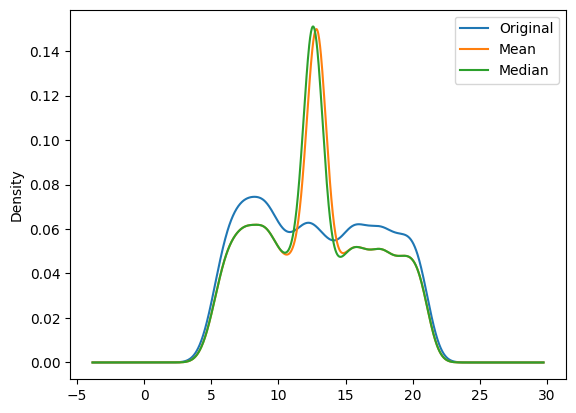

In [83]:
import matplotlib.pyplot as plt

train_data['Item_Weight'].plot(kind = "kde",label="Original")

train_data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

train_data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

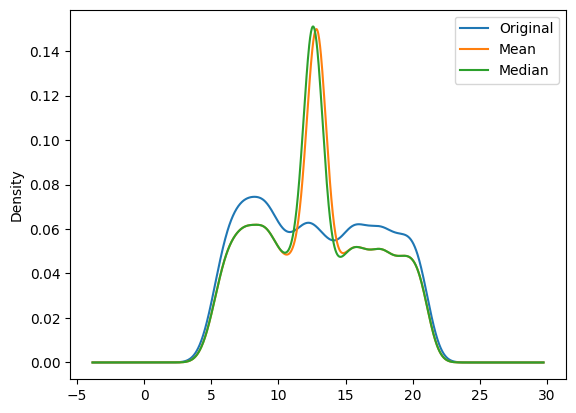

In [84]:
train_data['Item_Weight'].plot(kind = "kde",label="Original")

train_data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

train_data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

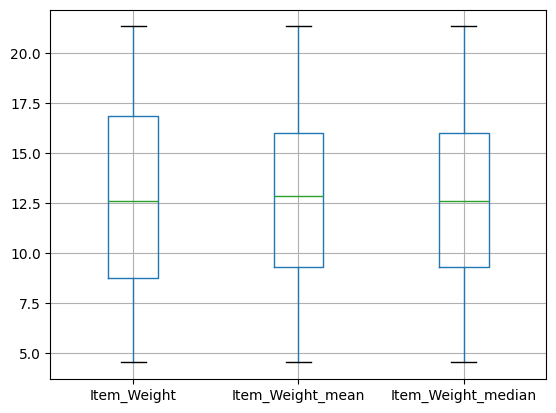

In [85]:
train_data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()
#spread of the data became smaller. 

In [86]:
train_data['Item_Weight_interploate']=train_data['Item_Weight'].interpolate(method="linear")
test_data['Item_Weight_interploate']=test_data['Item_Weight'].interpolate(method="linear")


In [87]:
train_data = train_data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)

In [88]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [89]:
test_data = test_data.drop(['Item_Weight'],axis=1)

In [90]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_interploate         0
dtype: int64

In [91]:
#missing values for column 'Outlet_size'
#categorical column
#using mode (most freq value)
train_data['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [92]:
train_data['Outlet_Size'].mode()


0    Medium
Name: Outlet_Size, dtype: object

In [93]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [94]:
train_data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [95]:
test_data.isnull().sum()


Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight_interploate      0
dtype: int64

In [96]:
train_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [97]:
train_data.columns


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [98]:
train_data['Item_Fat_Content'].value_counts()
# inconsistent categorical data

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [99]:
test_data['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [100]:
train_data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [101]:
test_data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         3668
Regular    2013
Name: count, dtype: int64

In [102]:
#another column "Item_Visibility"
train_data['Item_Visibility'].value_counts()


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [103]:
test_data['Item_Visibility'].value_counts()


Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [104]:
#handling 526 zeroes as missing values
train_data['Item_Visibility_interpolate']=train_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')
    # replacing all occurrences of 0 in the Item_Visibility column with NaN 
    #Applying linear interpolation.

In [105]:
test_data['Item_Visibility_interpolate']=test_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')


In [106]:
train_data['Item_Visibility_interpolate'].value_counts()


Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

In [107]:
test_data['Item_Visibility_interpolate'].value_counts()


Item_Visibility_interpolate
0.093531    2
0.072816    2
0.202948    2
0.107493    2
0.112131    2
           ..
0.089452    1
0.133171    1
0.103428    1
0.073685    1
0.104720    1
Name: count, Length: 5629, dtype: int64

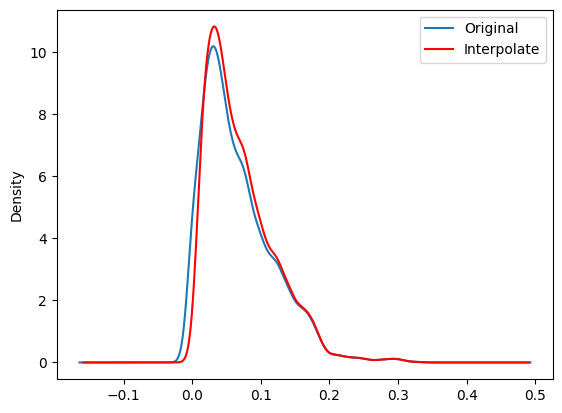

In [108]:
train_data['Item_Visibility'].plot(kind="kde",label="Original")

train_data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

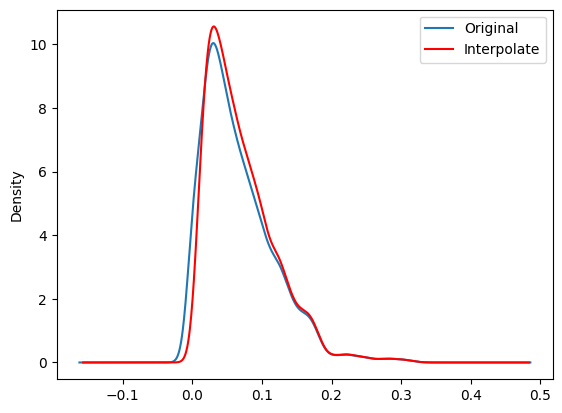

In [109]:
test_data['Item_Visibility'].plot(kind="kde",label="Original")

test_data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [110]:
train_data = train_data.drop('Item_Visibility',axis=1)
test_data = test_data.drop('Item_Visibility',axis=1)


In [111]:
#another column "Item_Type"
train_data['Item_Type'].value_counts()


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [112]:
test_data['Item_Type'].value_counts()


Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

In [113]:
#another column "Item_Identifier"
train_data['Item_Identifier'].value_counts().sample(5)


Item_Identifier
FDA11    5
FDV34    5
NCX05    8
FDN27    4
FDQ19    4
Name: count, dtype: int64

In [114]:
test_data['Item_Identifier'].value_counts().sample(5)


Item_Identifier
NCK18    3
FDD05    2
FDS31    2
FDE52    7
NCM41    4
Name: count, dtype: int64

In [115]:
train_data['Item_Identifier'] =train_data['Item_Identifier'].apply(lambda x : x[:2])
test_data['Item_Identifier'] =test_data['Item_Identifier'].apply(lambda x : x[:2])

In [116]:
train_data['Item_Identifier'].value_counts()


Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [117]:
test_data['Item_Identifier'].value_counts()


Item_Identifier
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

In [118]:
#FD - FOOD
#NC - NON-CONSUMABLE
#DR - DRINKS

In [119]:
#another column "Outlet_Establishment_Year"
import datetime as dt
current_year = dt.datetime.today().year
current_year


2025

In [120]:
train_data['Outlet_age']= current_year - train_data['Outlet_Establishment_Year']
train_data['Outlet_age']

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_age, Length: 8523, dtype: int64

In [121]:
test_data['Outlet_age']= current_year - test_data['Outlet_Establishment_Year']
test_data['Outlet_age']

0       26
1       18
2       27
3       18
4       40
        ..
5676    28
5677    16
5678    23
5679    18
5680    23
Name: Outlet_age, Length: 5681, dtype: int64

In [122]:
#OUTLET 0 IS 25 YEARS OLD
train_data = train_data.drop('Outlet_Establishment_Year',axis=1)


In [123]:
test_data = test_data.drop('Outlet_Establishment_Year',axis=1)


In [126]:
train_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [127]:
test_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [128]:
print(train_data["Item_MRP"].value_counts())

Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64


In [129]:
train_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [130]:
test_data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [132]:

from sklearn.preprocessing import OrdinalEncoder

train_data_encoded = train_data.copy()

cat_cols = train_data.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    train_data_encoded[col]=oe.fit_transform(train_data_encoded[[col]])
    print(oe.categories_)


[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [133]:
from sklearn.preprocessing import OrdinalEncoder

test_data_encoded = test_data.copy()

cat_cols = test_data.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    test_data_encoded[col]=oe.fit_transform(test_data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [134]:
from sklearn.preprocessing import OrdinalEncoder

train_data_encoded = train_data.copy()

cat_cols = train_data.select_dtypes(include=['object', 'category']).columns

In [135]:
for col in cat_cols:
    oe = OrdinalEncoder()
    
    # Fit and transform the column
    train_data_encoded[col] = oe.fit_transform(train_data_encoded[[col]])

    # Print the original categories and their assigned values
    print(f"Column: {col}")
    for i, category in enumerate(oe.categories_[0]):
        print(f"{category} -> {i}")
    print("\n")  # New line for readability

Column: Item_Identifier
DR -> 0
FD -> 1
NC -> 2


Column: Item_Fat_Content
LF -> 0
Regular -> 1


Column: Item_Type
Baking Goods -> 0
Breads -> 1
Breakfast -> 2
Canned -> 3
Dairy -> 4
Frozen Foods -> 5
Fruits and Vegetables -> 6
Hard Drinks -> 7
Health and Hygiene -> 8
Household -> 9
Meat -> 10
Others -> 11
Seafood -> 12
Snack Foods -> 13
Soft Drinks -> 14
Starchy Foods -> 15


Column: Outlet_Identifier
OUT010 -> 0
OUT013 -> 1
OUT017 -> 2
OUT018 -> 3
OUT019 -> 4
OUT027 -> 5
OUT035 -> 6
OUT045 -> 7
OUT046 -> 8
OUT049 -> 9


Column: Outlet_Size
High -> 0
Medium -> 1
Small -> 2


Column: Outlet_Location_Type
Tier 1 -> 0
Tier 2 -> 1
Tier 3 -> 2


Column: Outlet_Type
Grocery Store -> 0
Supermarket Type1 -> 1
Supermarket Type2 -> 2
Supermarket Type3 -> 3




In [136]:
train_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [137]:
test_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [138]:
train_data_encoded.corr(numeric_only = True)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
Item_Identifier,1.000000,-0.166111,0.007456,0.032517,-0.009730,-0.000624,0.007661,0.001136,0.011236,0.056939,-0.046347,0.008551
Item_Fat_Content,-0.166111,1.000000,-0.139434,0.006063,0.000764,-0.000622,-0.001598,0.002199,0.018719,-0.015030,0.048694,-0.003151
Item_Type,0.007456,-0.139434,1.000000,0.032651,0.001656,-0.001859,0.003084,0.003053,0.017048,0.028262,-0.033981,-0.004970
Item_MRP,0.032517,0.006063,0.032651,1.000000,0.003319,0.006059,0.000232,-0.001975,0.567574,0.024839,-0.006544,-0.005020
Outlet_Identifier,-0.009730,0.000764,0.001656,0.003319,1.000000,0.504603,-0.716176,0.099873,0.162325,-0.006937,-0.102528,-0.079035
Outlet_Size,-0.000624,-0.000622,-0.001859,0.006059,0.504603,1.000000,-0.614311,-0.201483,-0.086182,-0.010973,0.073277,-0.193389
Outlet_Location_Type,0.007661,-0.001598,0.003084,0.000232,-0.716176,-0.614311,1.000000,0.467219,0.089367,0.005960,-0.030813,0.089216
Outlet_Type,0.001136,0.002199,0.003053,-0.001975,0.099873,-0.201483,0.467219,1.000000,0.401522,-0.000858,-0.179788,0.122304
Item_Outlet_Sales,0.011236,0.018719,0.017048,0.567574,0.162325,-0.086182,0.089367,0.401522,1.000000,0.014536,-0.133874,0.049135
Item_Weight_interploate,0.056939,-0.015030,0.028262,0.024839,-0.006937,-0.010973,0.005960,-0.000858,0.014536,1.000000,-0.012096,-0.001220


In [139]:
#Min-Max scaling transforms the values to a range of [0, 1].
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()

# Applying Min-Max Scaling on  columns
train_data_encoded[['Item_Weight_interploate', 'Item_Visibility_interpolate', 'Item_MRP']] = scaler.fit_transform(train_data_encoded[['Item_Weight_interploate', 'Item_Visibility_interpolate', 'Item_MRP']])

print(train_data_encoded[['Item_Weight_interploate', 'Item_Visibility_interpolate', 'Item_MRP']].head())


   Item_Weight_interploate  Item_Visibility_interpolate  Item_MRP
0                 0.282525                     0.038399  0.927507
1                 0.081274                     0.048346  0.072068
2                 0.770765                     0.040593  0.468288
3                 0.871986                     0.037500  0.640093
4                 0.260494                     0.034407  0.095805


In [142]:
#Since We are dealing with continuos target variable
#This makes it a Regression Problem

In [143]:
train_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [144]:
test_data_encoded.dtypes

Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object

In [145]:
X=train_data_encoded.drop('Item_Outlet_Sales',axis=1)
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,0.927507,9.0,1.0,0.0,1.0,0.282525,0.038399,26
1,0.0,1.0,14.0,0.072068,3.0,1.0,2.0,2.0,0.081274,0.048346,16
2,1.0,0.0,10.0,0.468288,9.0,1.0,0.0,1.0,0.770765,0.040593,26
3,1.0,1.0,6.0,0.640093,0.0,1.0,2.0,0.0,0.871986,0.037500,27
4,2.0,0.0,9.0,0.095805,1.0,0.0,2.0,1.0,0.260494,0.034407,38
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,0.777729,1.0,0.0,2.0,1.0,0.137541,0.163812,38
8519,1.0,1.0,0.0,0.326263,7.0,1.0,1.0,1.0,0.227746,0.133638,23
8520,2.0,0.0,8.0,0.228492,6.0,2.0,1.0,1.0,0.359929,0.097321,21
8521,1.0,1.0,13.0,0.304939,3.0,1.0,2.0,2.0,0.158083,0.436080,16


In [146]:
Y=train_data_encoded['Item_Outlet_Sales']
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)
#20% of the data will be used for testing, and the remaining 80% will be used for training.


In [148]:
# used to transform the data so that each feature has a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [151]:
X_train_std= sc.fit_transform(X_train)


In [152]:
X_test_std= sc.transform(X_test)


In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (no activation)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test_std, Y_test)
print(f"\n Test MAE: {mae:.2f}")
print(f" Test MSE: {loss:.2f}")

# Predict using the model
y_pred = model.predict(X_test_std)

# Calculate and print R2 score
r2 = r2_score(Y_test, y_pred)
print(f" Test R2 Score: {r2:.4f}")



Epoch 1/50
192/192 [==============================] - 2s 4ms/step - loss: 7483276.0000 - mae: 2134.3584 - val_loss: 5816659.5000 - val_mae: 1784.3893
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 2791133.0000 - mae: 1174.2703 - val_loss: 1430612.8750 - val_mae: 915.0707
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 1473458.2500 - mae: 910.4578 - val_loss: 1304622.2500 - val_mae: 851.4990
Epoch 4/50
192/192 [==============================] - 1s 3ms/step - loss: 1408131.5000 - mae: 875.2466 - val_loss: 1273982.3750 - val_mae: 827.8967
Epoch 5/50
192/192 [==============================] - 1s 3ms/step - loss: 1379028.5000 - mae: 858.1187 - val_loss: 1246217.3750 - val_mae: 818.0711
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 1355169.1250 - mae: 847.2420 - val_loss: 1230145.7500 - val_mae: 809.0289
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 1335076.5000 - mae: 839.7858 - val_

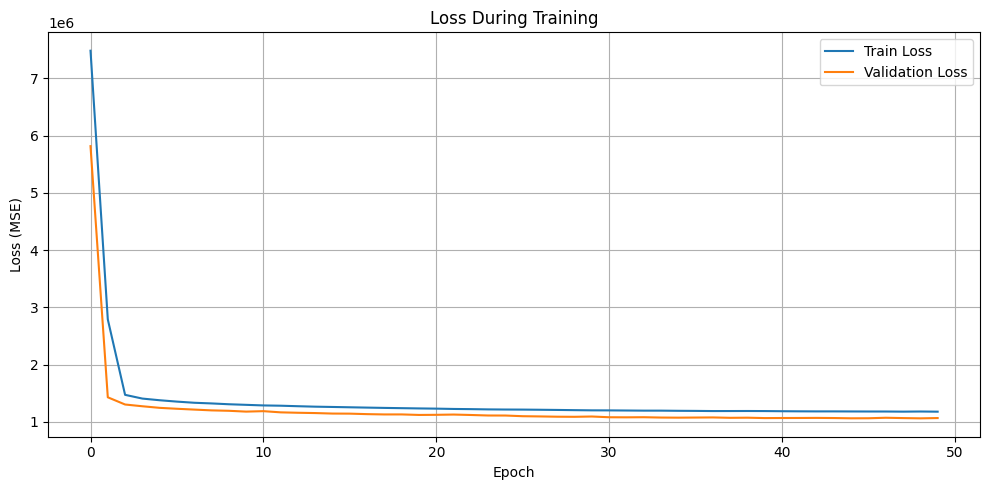

In [168]:
# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [172]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Build Improved ANN
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_std.shape[1],)))
model.add(Dropout(0.3))  # prevents overfitting 
#30% of the neurons (because of 0.3) in that layer are randomly turned off (i.e., ignored).

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))  # Output layer (regression)

# Compile with tuned optimizer
opt = Adam(learning_rate=0.001) 
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

# Early stopping to avoid overtraining
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train_std, Y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate
loss, mae = model.evaluate(X_test_std, Y_test)
y_pred = model.predict(X_test_std)

# Metrics
print(" Test MAE:", round(mae, 2))
print(" Test RMSE:", round(np.sqrt(mean_squared_error(Y_test, y_pred)), 2))
print(" Test R2 Score:", round(r2_score(Y_test, y_pred), 4))




Epoch 1/100
171/171 [==============================] - 3s 5ms/step - loss: 6198293.0000 - mae: 1878.4774 - val_loss: 2075291.3750 - val_mae: 1066.0428
Epoch 2/100
171/171 [==============================] - 1s 4ms/step - loss: 1662078.7500 - mae: 972.6301 - val_loss: 1471923.2500 - val_mae: 915.9257
Epoch 3/100
171/171 [==============================] - 1s 4ms/step - loss: 1504254.8750 - mae: 904.3824 - val_loss: 1429003.5000 - val_mae: 883.0771
Epoch 4/100
171/171 [==============================] - 1s 4ms/step - loss: 1448260.2500 - mae: 879.5902 - val_loss: 1397597.1250 - val_mae: 866.9905
Epoch 5/100
171/171 [==============================] - 1s 4ms/step - loss: 1429630.6250 - mae: 868.1461 - val_loss: 1367545.6250 - val_mae: 854.2825
Epoch 6/100
171/171 [==============================] - 1s 4ms/step - loss: 1416471.6250 - mae: 853.1939 - val_loss: 1350569.6250 - val_mae: 844.8065
Epoch 7/100
171/171 [==============================] - 1s 4ms/step - loss: 1404985.7500 - mae: 855.6437 

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


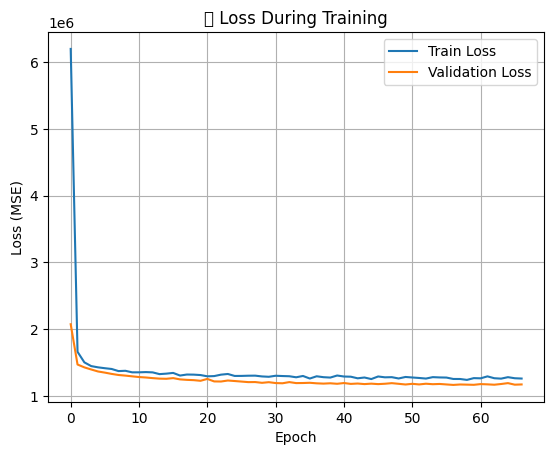

In [173]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(" Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

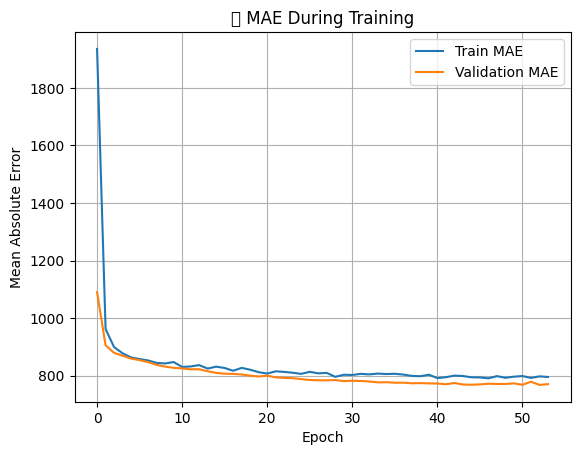

In [171]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title(" MAE During Training")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


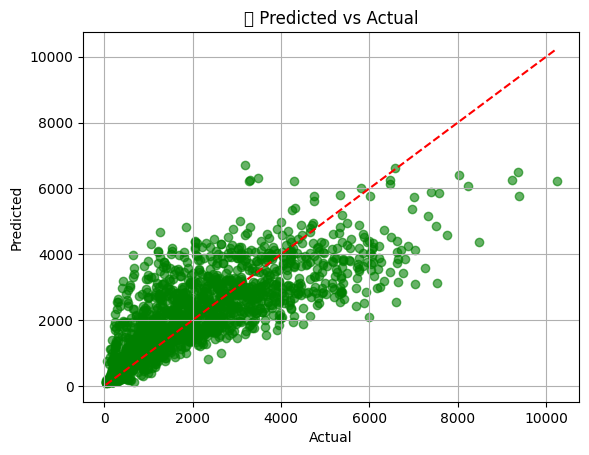

In [157]:
plt.scatter(Y_test, y_pred, alpha=0.6, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # perfect line
plt.title(" Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


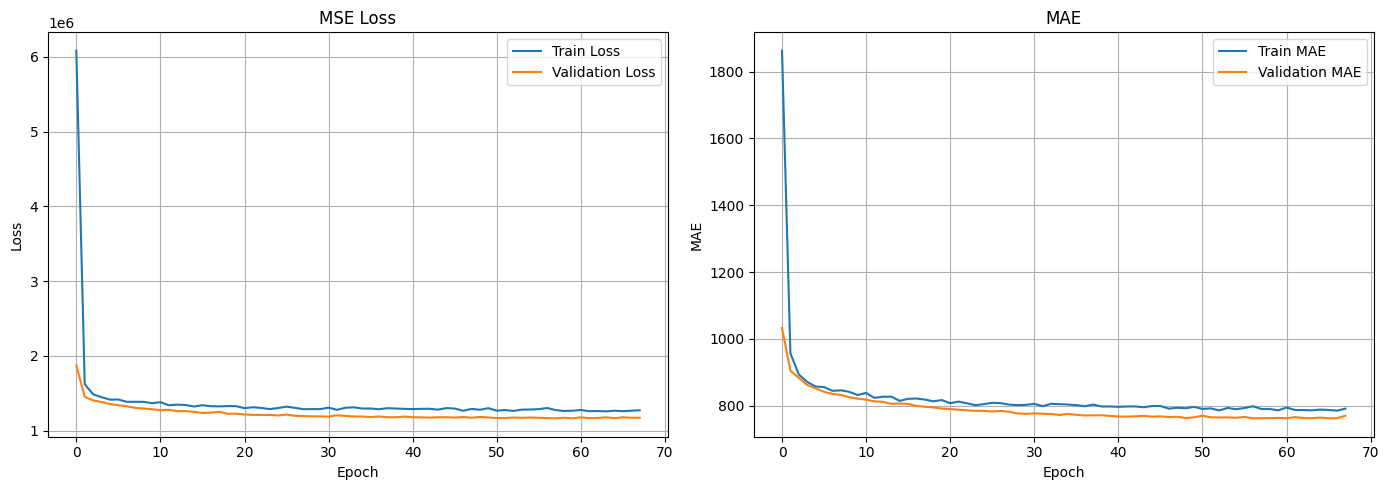

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Loss
ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('MSE Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

# MAE
ax[1].plot(history.history['mae'], label='Train MAE')
ax[1].plot(history.history['val_mae'], label='Validation MAE')
ax[1].set_title('MAE')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MAE')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
